In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
imimportport seaborn as sn
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Loading Dataset

In [ ]:
df_fake = pd.read_csv("Fake\Fake.csv")
df_true = pd.read_csv("True\True.csv")
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
print(df_fake.shape,df_true.shape)

(23481, 4) (21417, 4)


In [ ]:
df_true["text"] = df_true["text"].replace("(Reuters)","",regex=True)
df_true.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017"


In [ ]:
df_fake["target"] = 0
df_true["target"] = 1

In [ ]:
df_true.head(10)

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON () - The head of a conservative Rep...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON () - Transgender people will be all...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON () - The special counsel investigat...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON () - Trump campaign adviser George ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON () - President Donald Trump...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON () - The Whit...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla () - President Donald Tru...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON () - Alabama Secretary of State Joh...,politicsNews,"December 28, 2017",1


In [ ]:
df_fake.head(10)

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
df_fake = df_fake.drop(["title","subject","date"],axis = 1)
df_true = df_true.drop(["title","subject","date"],axis = 1)

merging fake and true dataframe

In [ ]:
df = pd.concat([df_fake,df_true],axis = 0)

In [ ]:
print(df.shape)

(44898, 2)


Checking null values in our dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   target  44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [ ]:
df.head(10)

,text,target
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
df = df.sample(frac=1)
df.head(10)

,text,target
10931,Hillary Clinton was dogged throughout her camp...,0
20027,"OMAHA, Neb. () - U.S. Defense Secretary Jim Ma...",1
8402,CHICAGO () - Potential action this week by Ill...,1
10116,This is awesome! Basketball great Charles Bark...,0
716,WASHINGTON () - The Republican-controlled U.S....,1
23279,21st Century Wire says The privatization of ...,0
12173,President-elect @realDonaldTrump to protester:...,0
19265,WELLINGTON () - New Zealand Green Party leader...,1
18257,A group of volunteer soldiers announced this w...,0
5658,"On the night of June 18, Tupelo, Mississippi p...",0


In [ ]:
df.reset_index(inplace=True)
df.drop(["index"], axis = 1, inplace = True)
df.head(10)

,text,target
0,Hillary Clinton was dogged throughout her camp...,0
1,"OMAHA, Neb. () - U.S. Defense Secretary Jim Ma...",1
2,CHICAGO () - Potential action this week by Ill...,1
3,This is awesome! Basketball great Charles Bark...,0
4,WASHINGTON () - The Republican-controlled U.S....,1
5,21st Century Wire says The privatization of ...,0
6,President-elect @realDonaldTrump to protester:...,0
7,WELLINGTON () - New Zealand Green Party leader...,1
8,A group of volunteer soldiers announced this w...,0
9,"On the night of June 18, Tupelo, Mississippi p...",0


Text(0, 0.5, 'Size of News Articles')

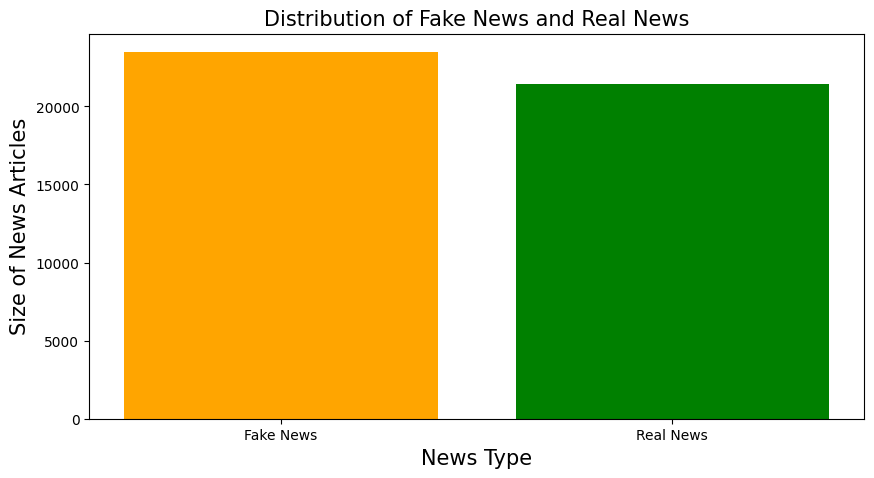

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar('Fake News', len(df[df['target']==0]), color='orange')
plt.bar('Real News', len(df[df['target']==1]), color='green')
plt.title('Distribution of Fake News and Real News', size=15)
plt.xlabel('News Type', size=15)
plt.ylabel('Size of News Articles', size=15)

# Removing Special Characters

In [ ]:
def wordopt(text):
    # Convert the text to lowercase
    text = text.lower()

    # Remove text within square brackets, often used for annotations or additional information
    text = re.sub('\[.*?\]', '', text)

    # Remove parentheses and content within them
    text = re.sub('[()]', '', text)

    # Replace non-word characters (symbols, punctuation) with a space
    text = re.sub('\\W', ' ', text)

    # Remove URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)

    # Remove punctuation using string.punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove newline characters
    text = re.sub('\n', '', text)

    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)

    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)
df.head(100)

,text,target
0,hillary clinton was dogged throughout her camp...,0
1,omaha neb u s defense secretary jim matt...,1
2,chicago potential action this week by illin...,1
3,this is awesome basketball great charles bark...,0
4,washington the republican controlled u s h...,1
...,...,...
95,after months of internal discord republica...,1
96,kampala uganda s main opposition leader was...,1
97,donald trump kicked off his sunday morning by ...,0
98,cairo iraqi kurdish leaders must be prepare...,1


# For Tokenization

In [ ]:
#Downloading nltk data
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

# For StopWords removal

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# For Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer

# Applying tokenization,stopwords removal and lemmatization

In [ ]:
lemmatizer=WordNetLemmatizer()
for index,row in df.iterrows():
    filter_sentence = ''

    sentence = row['text']

    words = nltk.word_tokenize(sentence) #tokenization

    words = [w for w in words if not w in stop_words]  #stopwords removal

    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()

    df.loc[index,'text'] = filter_sentence

In [ ]:
print(df.head())

                                                text  target
0   hillary clinton dogged throughout campaign de...       0
1   omaha neb u defense secretary jim mattis said...       1
2   chicago potential action week illinois bigges...       1
3   awesome basketball great charles barkley spok...       0
4   washington republican controlled u house way ...       1


In [ ]:
X = df["text"]
Y = df["target"]
X.shape

(44898,)

# Test-Train Split

In [ ]:
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=5)
X_train.shape

(33673,)

# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#print(X_train)
vectorization = TfidfVectorizer()
analyze = vectorization.build_analyzer()
#print(analyze(X_train[0]))
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(x_test)
print(xv_train.shape)
print(xv_test.shape)

(33673, 87899)
(11225, 87899)


# Apply Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xv_train,Y_train)
y_pred=logreg.predict(xv_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy}')

Accuracy of Logistic Regression: 0.9790645879732739


In [ ]:
y_test[y_test==0].count()

5881

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[5741  140]
 [  95 5249]]


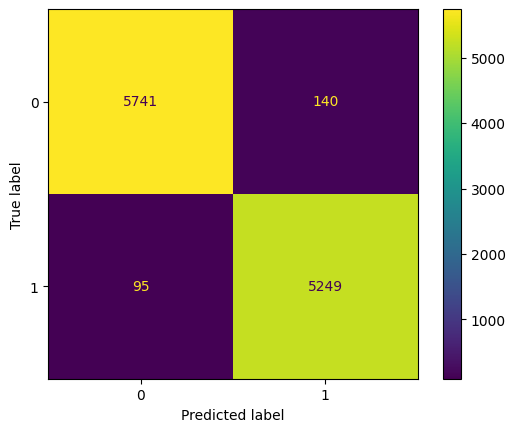

In [ ]:
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:False','Predicted:True'],index=['Actual:False','Actual:True'])
# plt.figure(figsize = (7,5))
# sn.heatmap(cm, annot=True,fmt='d')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
print(TN,TP,FN,FP)

5825 5189 104 107


In [ ]:
print(classification_report(y_test,logreg.predict(xv_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5932
           1       0.98      0.98      0.98      5293

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(dtc.score(xv_test,y_test)))
print(classification_report(y_test,dtc.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9525167037861916

              precision    recall  f1-score   support



           0       0.95      0.96      0.96      5908

           1       0.96      0.94      0.95      5317



    accuracy                           0.95     11225

   macro avg       0.95      0.95      0.95     11225

weighted avg       0.95      0.95      0.95     11225




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gclf = GradientBoostingClassifier()
gclf.fit(xv_train,Y_train)
print("The Accuracy of the Decision Tree Classifier Model is {}".format(gclf.score(xv_test,y_test)))
print(classification_report(y_test,gclf.predict(xv_test)))

The Accuracy of the Decision Tree Classifier Model is 0.9708685968819599

              precision    recall  f1-score   support



           0       0.98      0.97      0.97      5908

           1       0.96      0.97      0.97      5317



    accuracy                           0.97     11225

   macro avg       0.97      0.97      0.97     11225

weighted avg       0.97      0.97      0.97     11225




In [ ]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(xv_train,Y_train)
print("The Accuracy of the Random Forest Classifier Model is {}".format(rclf.score(xv_test,y_test)))
print(classification_report(y_test,rclf.predict(xv_test)))

The Accuracy of the Random Forest Classifier Model is 0.9778173719376392

              precision    recall  f1-score   support



           0       0.98      0.98      0.98      5908

           1       0.98      0.98      0.98      5317



    accuracy                           0.98     11225

   macro avg       0.98      0.98      0.98     11225

weighted avg       0.98      0.98      0.98     11225




In [ ]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = lr.predict(new_xv_test)
    pred_DT = dtc.predict(new_xv_test)
    pred_GBC = gclf.predict(new_xv_test)
    pred_RFC = rclf.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                              output_lable(pred_RFC[0])))

In [ ]:
news = str(input())
manual_testing(news)

BRUSSELS  - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against Taliban insurgents, saying: Our troops will fight to win . U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an extraordinary sacrifice of blood and treasure . We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will, Trump said

In [ ]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a

In [ ]:
news = str(input())
manual_testing(news)

SAO PAULO - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for Obras Arranjadas pelo Sogro - or Work Arranged by the Father-In-Law. After years of steady growth t